In [1]:
# Make sure to select Runtime > Change runtime type and choose one with a GPU.

# Installation and setup
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastbook import *


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.1/542.1 kB 30.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 46.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 69.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.31.0, but you have requests 2.32.3 which is incompatible.
Mounted at /content/gdrive


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


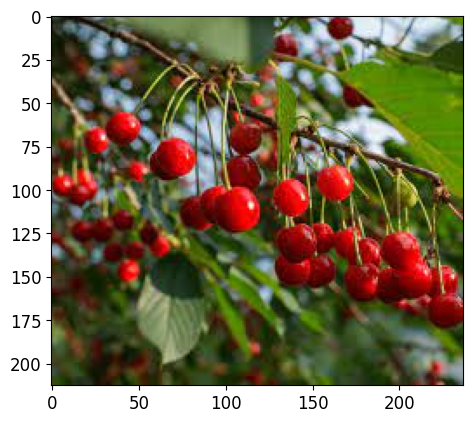

In [3]:
# Let's see what an image looks like

images_dir_path = '/content/drive/MyDrive/Agricultural_crops'  # Specify the directory path where images are stored
file_path = os.path.join(images_dir_path, "Cherry")  # Append the "Cherry" subdirectory to the main directory path
file_path = os.path.join(file_path, "image15.jpeg")  # Append the image filename to the "Cherry" subdirectory path

from PIL import Image  # Import the Image class from the PIL (Python Imaging Library) module
image = Image.open(file_path)  # Open the image file

from matplotlib import pyplot  # Import the pyplot module from matplotlib for plotting
pyplot.imshow(image)  # Display the image

In [4]:
from fastai.vision.all import *  # Import all functions and classes from fastai.vision module


In [5]:
# Create a DataBlock

block = DataBlock(
    blocks=(ImageBlock, CategoryBlock),  # Define the type of inputs (images) and outputs (categories)
    get_items=get_image_files,  # Function to get the list of image files
    splitter=RandomSplitter(seed=42),  # Split the data into training and validation sets randomly
    get_y=parent_label,  # Function to get labels from the parent directory name
    item_tfms=Resize(256),  # Resize each image to 256x256 pixels
    batch_tfms=aug_transforms()  # Apply data augmentation to the batches
)

# Use the DataBlock to create a DataLoader
loaders = block.dataloaders(images_dir_path)  # Create DataLoader from the images directory path
print(f"loaders:\n{loaders}")  # Print the DataLoader information

loaders:


In [6]:
# Let's create a learner using an existing model -- loss_func is implicitly set

learner = vision_learner(  # Create a vision learner
    loaders,  # Use the DataLoader created earlier as the data source
    alexnet,  # Use the AlexNet pre-trained model
    metrics=error_rate  # Use error rate as a validation metric to display during training
)

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:03<00:00, 61.8MB/s]


In [7]:
# Lets train for a single epoch to confirm all things are set up properly
learner.fine_tune( 1 )

epoch,train_loss,valid_loss,error_rate,time
0,4.562902,3.187446,0.836364,05:54


epoch,train_loss,valid_loss,error_rate,time
0,3.379642,2.594177,0.751515,00:11


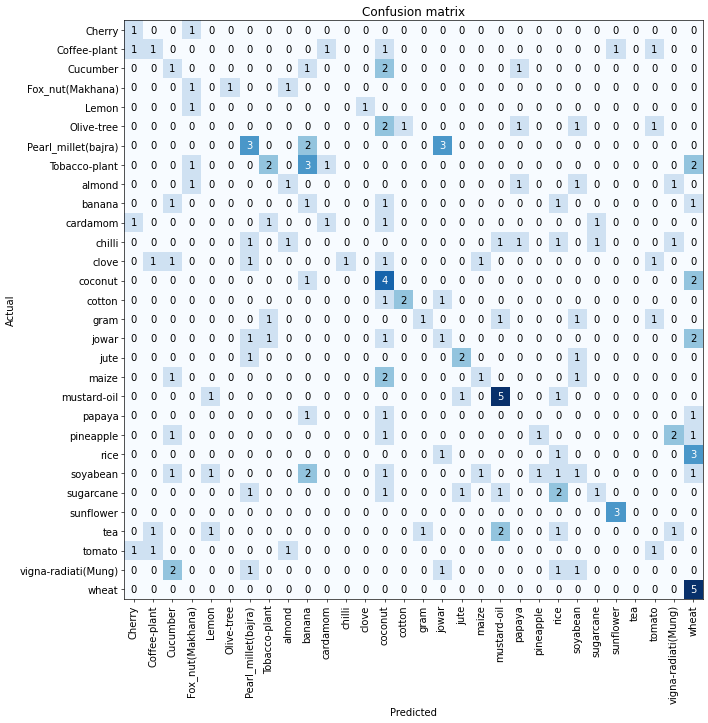

In [8]:
# What is our starting state?
# Validation data is used to calculate confusion matrix.

interpretation = ClassificationInterpretation.from_learner(learner)  # Create a ClassificationInterpretation object from the learner
interpretation.plot_confusion_matrix(figsize=(12, 12), dpi=60)  # Plot the confusion matrix with specified figure size and resolution


LR suggestion = 2.75e-04


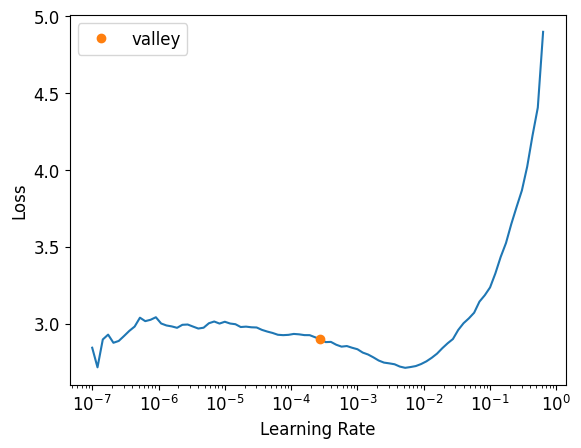

In [9]:
# What's a good learning rate for this model-problem?

lr_suggestion = learner.lr_find()  # Find and suggest a good learning rate for the model
print(f"LR suggestion = {lr_suggestion[0]:.2e}")  # Print the suggested learning rate in scientific notation

In [10]:
# We could tinker in more detail with the layer training, but let's just run
# fine_tune a couple of times with the preferred learning rate and see if that
# gets us to a good spot

for i in range(10):  # Loop for fine-tuning iterations
    print(f"\n\nfine tuning iteration #{i+1}")  # Print the current fine-tuning iteration number
    learner.fine_tune(1, base_lr = 2.75e-04)  # Fine-tune the model for 1 epoch with the preferred learning rate




fine tuning iteration #1


epoch,train_loss,valid_loss,error_rate,time
0,2.872773,2.456000,0.709091,00:10


epoch,train_loss,valid_loss,error_rate,time
0,2.787744,2.388933,0.690909,00:12




fine tuning iteration #2


epoch,train_loss,valid_loss,error_rate,time
0,2.749322,2.331886,0.654545,00:11


epoch,train_loss,valid_loss,error_rate,time
0,2.759637,2.296791,0.642424,00:11




fine tuning iteration #3


epoch,train_loss,valid_loss,error_rate,time
0,2.647527,2.240866,0.624242,00:09


epoch,train_loss,valid_loss,error_rate,time
0,2.617081,2.206852,0.618182,00:11




fine tuning iteration #4


epoch,train_loss,valid_loss,error_rate,time
0,2.543868,2.173429,0.624242,00:11


epoch,train_loss,valid_loss,error_rate,time
0,2.444075,2.155254,0.624242,00:09




fine tuning iteration #5


epoch,train_loss,valid_loss,error_rate,time
0,2.425268,2.108855,0.600000,00:10


epoch,train_loss,valid_loss,error_rate,time
0,2.269523,2.079224,0.593939,00:12




fine tuning iteration #6


epoch,train_loss,valid_loss,error_rate,time
0,2.248687,2.042292,0.593939,00:10


epoch,train_loss,valid_loss,error_rate,time
0,2.101719,2.014582,0.587879,00:10




fine tuning iteration #7


epoch,train_loss,valid_loss,error_rate,time
0,2.261742,1.984930,0.569697,00:11


epoch,train_loss,valid_loss,error_rate,time
0,2.071355,1.971146,0.581818,00:10




fine tuning iteration #8


epoch,train_loss,valid_loss,error_rate,time
0,1.996780,1.939607,0.569697,00:09


epoch,train_loss,valid_loss,error_rate,time
0,2.002139,1.925958,0.575758,00:12




fine tuning iteration #9


epoch,train_loss,valid_loss,error_rate,time
0,1.961652,1.885300,0.557576,00:11


epoch,train_loss,valid_loss,error_rate,time
0,1.925085,1.875793,0.557576,00:09




fine tuning iteration #10


epoch,train_loss,valid_loss,error_rate,time
0,1.908237,1.847599,0.539394,00:11


epoch,train_loss,valid_loss,error_rate,time
0,1.903189,1.843277,0.539394,00:11


LR suggestion = 2.75e-04


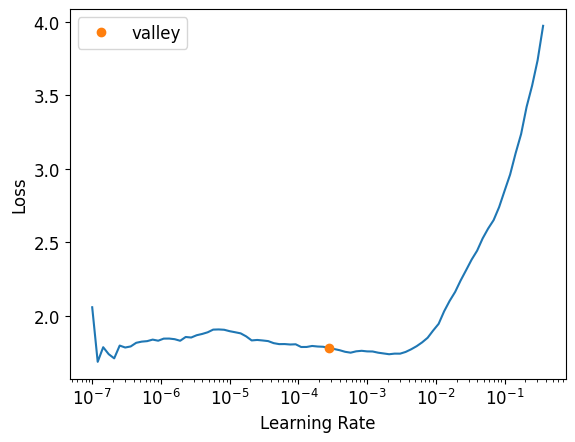

In [11]:
# Lets see did the recommended learning rate change?
lr_suggestion = learner.lr_find( )
print( f"LR suggestion = {lr_suggestion[ 0 ]:.2e}" )

In [12]:
# Let's adjust and train a bit more -- we should get to a point
# where we should clearly stop training

for i in range(5):  # Loop for additional fine-tuning iterations
    print(f"\n\nfine tuning iteration #{i+1}")  # Print the current fine-tuning iteration number
    learner.fine_tune(1, base_lr=2.75e-04)  # Fine-tune the model for 1 epoch with the preferred learning rate



fine tuning iteration #1


epoch,train_loss,valid_loss,error_rate,time
0,1.760926,1.818810,0.533333,00:16


epoch,train_loss,valid_loss,error_rate,time
0,1.787507,1.798097,0.533333,00:11




fine tuning iteration #2


epoch,train_loss,valid_loss,error_rate,time
0,1.764251,1.790853,0.533333,00:09


epoch,train_loss,valid_loss,error_rate,time
0,1.698578,1.775848,0.515152,00:10




fine tuning iteration #3


epoch,train_loss,valid_loss,error_rate,time
0,1.721836,1.726248,0.496970,00:11


epoch,train_loss,valid_loss,error_rate,time
0,1.627408,1.721948,0.503030,00:09




fine tuning iteration #4


epoch,train_loss,valid_loss,error_rate,time
0,1.619491,1.708110,0.503030,00:10


epoch,train_loss,valid_loss,error_rate,time
0,1.604359,1.694649,0.503030,00:11




fine tuning iteration #5


epoch,train_loss,valid_loss,error_rate,time
0,1.480196,1.673632,0.472727,00:09


epoch,train_loss,valid_loss,error_rate,time
0,1.507186,1.671056,0.472727,00:11


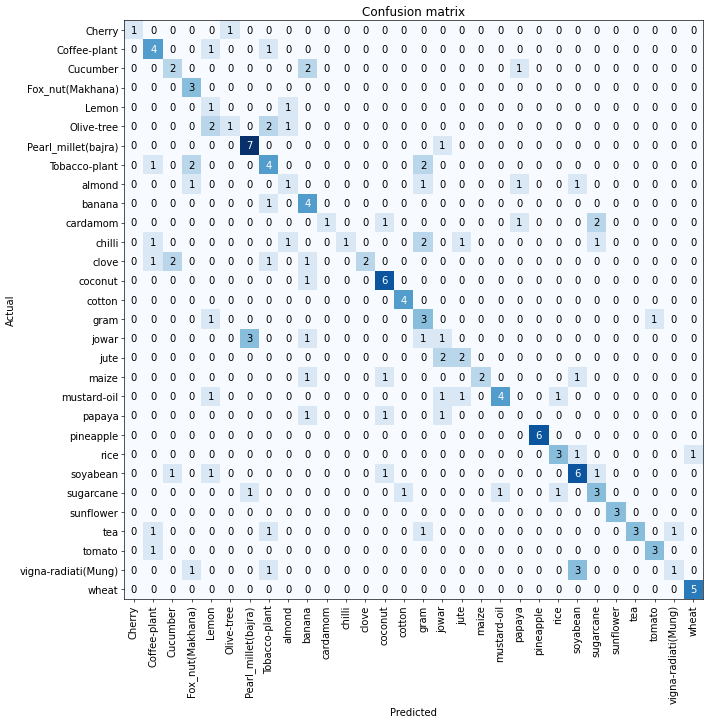

In [13]:
# What does our confusion matrix look like now?
interpretation = ClassificationInterpretation.from_learner( learner )
interpretation.plot_confusion_matrix( figsize = ( 12, 12 ), dpi = 60 )


prediction = sugarcane
prediction_index: 24
prediction_scores: tensor([2.7316e-03, 2.0663e-04, 3.6048e-03, 2.0569e-04, 2.2425e-03, 3.3537e-03, 3.2283e-01, 7.5783e-05, 5.2021e-03, 7.2151e-02, 7.4951e-02, 1.2503e-02, 3.0440e-03, 3.4308e-02, 1.3394e-04, 8.1791e-04,
        3.6249e-04, 3.8057e-02, 2.5642e-02, 4.3216e-04, 1.7541e-02, 1.9163e-02, 2.2605e-03, 4.6854e-04, 3.4823e-01, 3.9752e-04, 2.2838e-04, 4.0865e-03, 3.0414e-03, 1.7184e-03])




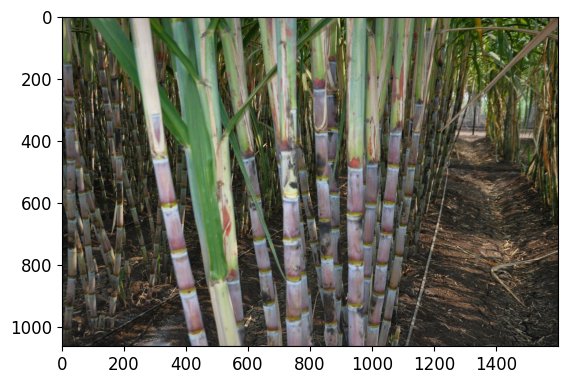

In [14]:
# Let's make a prediction using one of the original images
file_path = os.path.join( images_dir_path, "sugarcane" )
file_path = os.path.join( file_path, "image (11).jpg" )
image = Image.open( file_path )
pyplot.imshow( image )

# Make a prediction
prediction, prediction_index, prediction_scores = learner.predict( file_path )
print( f"prediction = {prediction}\nprediction_index: {prediction_index}\nprediction_scores: {prediction_scores}\n\n" )

In [15]:
# Let's also save our model for posterity
learner.export( )
os.listdir( )

['.config', 'export.pkl', 'gdrive', 'drive', 'models', 'sample_data']

prediction = chilli
prediction_index = 11


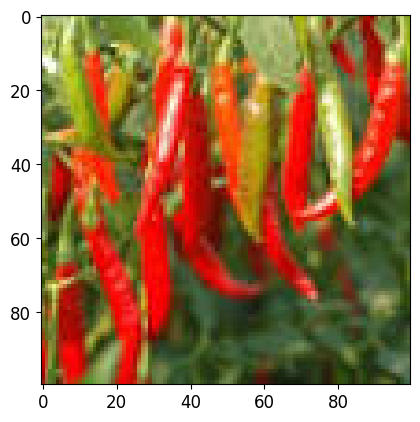

In [16]:
# And to come full circle, let's clear the learner, load the model and make a
# prediction to demonstrate portability
learner = []
learner = load_learner( "export.pkl" )

# Let's make a prediction using one of the original images
file_path = os.path.join( images_dir_path, "chilli" )
file_path = os.path.join( file_path, "image.jpeg" )
from PIL import Image
image = Image.open( file_path )
from matplotlib import pyplot
pyplot.imshow( image )

# Make a prediction
prediction, prediction_index, prediction_scores = learner.predict( file_path )
print( f"prediction = {prediction}\nprediction_index = {prediction_index}" )